In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [82]:
### 混合正規分布サンプルデータの生成
def build_toy_dataset(N):
  pi = np.array([0.4, 0.6])
  mus = [[1, 1], [-1, -1]]
  stds = [[0.1, 0.1], [0.1, 0.1]]
  x = np.zeros((N, 2), dtype=np.float32)
  for n in range(N):
    k = np.argmax(np.random.multinomial(1, pi))
    x[n, :] = np.random.multivariate_normal(mus[k], np.diag(stds[k]))
 
  return x
 
N = 50000  # number of data points
D = 2  # dimensionality of data

X = build_toy_dataset(N)

In [67]:
rvs = X
kde = stats.kde.gaussian_kde(rvs.T)

x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]  # rvs[:,0]を128分割した１次元配列
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]  # rvs[:,0]を128分割した１次元配列

x,y = np.meshgrid(x_flat,y_flat)  # ヒートマップ表示用の２次元グリッド作成

grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
z = kde(grid_coords.T)  # ２次元グリッド 各点の確率密度を取得
z = z.reshape(128,128)
aspect_val = 0.75  # ptp: 値の範囲(最大値-最小値)

plt.imshow(
        z,
        aspect=aspect_val,  # aspectで縦横比を調整
        cmap="jet",  # 色の選択（https://matplotlib.org/examples/color/colormaps_reference.html）
        extent=(x.min(), x.max(), y.min(), y.max()),
        origin="lower"
    )  

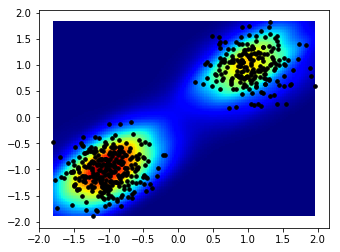

In [68]:
plt.scatter(X[:, 0], X[:, 1], color='black', marker='.', s=50)
# plt.axis([-3, 3, -3, 3])
plt.show()

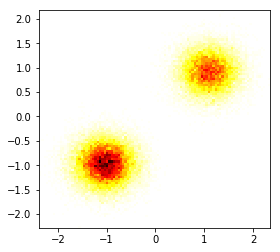

In [92]:
### ヒストグラムを描写
heatmap, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure()
plt.imshow(
        heatmap, 
        extent=extent, 
        cmap="hot_r",
        origin="lower"
    )
plt.show()

In [119]:
print(np.shape(xedges[0:-1]))
print(np.shape(yedges))
print(np.shape(heatmap))
print(xedges)
print(yedges)
print(heatmap)

(100,)
(101,)
(100, 100)
[-1.5  -1.49 -1.48 -1.47 -1.46 -1.45 -1.44 -1.43 -1.42 -1.41 -1.4  -1.39
 -1.38 -1.37 -1.36 -1.35 -1.34 -1.33 -1.32 -1.31 -1.3  -1.29 -1.28 -1.27
 -1.26 -1.25 -1.24 -1.23 -1.22 -1.21 -1.2  -1.19 -1.18 -1.17 -1.16 -1.15
 -1.14 -1.13 -1.12 -1.11 -1.1  -1.09 -1.08 -1.07 -1.06 -1.05 -1.04 -1.03
 -1.02 -1.01 -1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91
 -0.9  -0.89 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79
 -0.78 -0.77 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67
 -0.66 -0.65 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55
 -0.54 -0.53 -0.52 -0.51 -0.5 ]
[-1.497998 -1.487998 -1.477998 -1.467998 -1.457998 -1.447998 -1.437998
 -1.427998 -1.417998 -1.407998 -1.397998 -1.387998 -1.377998 -1.367998
 -1.357998 -1.347998 -1.337998 -1.327998 -1.317998 -1.307998 -1.297998
 -1.287998 -1.277998 -1.267998 -1.257998 -1.247998 -1.237998 -1.227998
 -1.217998 -1.207998 -1.197998 -1.187998 -1.177998 -1.167998 -1.157998
 -1.

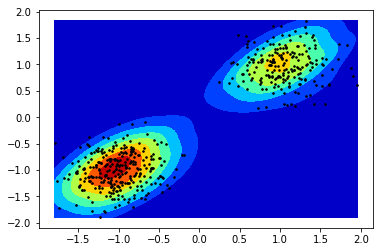

In [150]:
### ヒストグラムを描写
heatmap, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.contourf(x_flat, y_flat, z, alpha=1, cmap='jet')
plt.scatter(rvs[:,0], rvs[:,1], color='black', marker='.', s=10)
plt.show()

In [79]:
np.shape(rvs)

(500, 2)

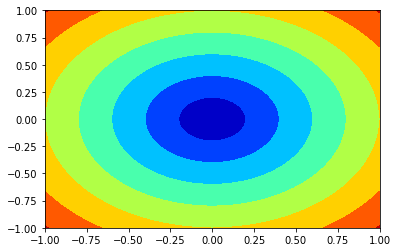

In [109]:
### 2d 等高線

import numpy as np
import matplotlib.pyplot as plt
 
n = 1000
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
 
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
 
#
# meshgrid で作った X と Y、そして高さ Z を contour に渡す
#
# plt.contour(X, Y, Z)

# cont = plt.contour(X, Y, Z, levels=[0.2, 0.4, 1.0])
# cont = plt.contour(X, Y, Z, cmap='jet')
cont = plt.contourf(X, Y, Z, cmap='jet')
# cont.clabel(fmt='%1.1f', fontsize=14)
 
# plt.gca().set_aspect('equal')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

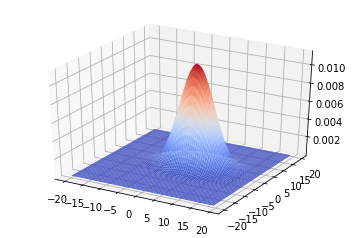

In [11]:
### 3d ヒートマップ

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)
 
#平均と分散
mu = np.array([3,1])
sigma = np.array([[20,0],
                  [0,10]])
 
#行列式
det = np.linalg.det(sigma)
 
#逆行列
inv_sigma = np.linalg.inv(sigma)
 
#ガウス二次元確率密度を返す関数
def f(x, y):
    x_c = np.array([x, y]) - mu
    return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T) / 2.0) / (2*np.pi*np.sqrt(det))
 
#配列それぞれ対応するものを返す関数に変える
Z = np.vectorize(f)(X,Y)
 
 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

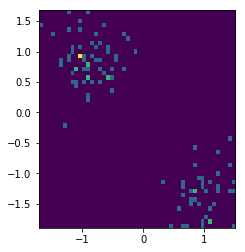

In [25]:
### ヒストグラムを描写
heatmap, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure()
plt.imshow(heatmap, extent=extent)
plt.show()

(2000, 2)


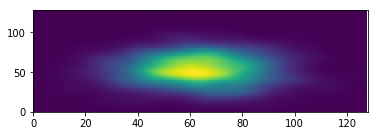

In [27]:
import numpy as np
import scipy.stats as stats
# from matplotlib.pyplot import imshow

# Create some dummy data
rvs = np.append(
                stats.norm.rvs(loc=2,scale=1,size=(2000,1)),
                stats.norm.rvs(loc=0,scale=3,size=(2000,1)),
                axis=1
                )
# print(np.shape(rvs)) #サイズ確認用

kde = stats.kde.gaussian_kde(rvs.T)

# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(128,128)


plt.xlim(0, 128)
plt.ylim(0, 128)

plt.imshow(z,aspect=x_flat.ptp()/y_flat.ptp())
plt.show()

# print(np.shape(z))
# print(x_flat.ptp()/y_flat.ptp())